**Modeling**

Utilizing the Decision Tree Classifier
Then displaying the Hyperparameter evaluations with Grid Search

Performing some Pre-Modeling - Take the existing Sample dataset -Make this dataset concise for modeling purposes

In [1]:
#Using the cleaned data file to create a smaller sample fine for modeling  

import pandas as pd
import numpy as np

# Read the entire CSV file
df = pd.read_csv('C:/Users/deema/Financial-Fraud-1/Processed Data/cleaned_fraud_data.csv')

# Select the first 10,000 rows
df_model = df[:10000]


In [2]:
#Observe the header of the new sample df for modeling
df_model.head()


,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,TRANSFER,3573.11,0.00,0.00,C422466055,223901.18,227474.28,0,0
1,PAYMENT,6141.99,337394.62,331252.63,M404619443,0.00,0.00,0,0
2,CASH_OUT,526504.25,0.00,0.00,C790886408,32111553.59,32638057.85,0,0
3,CASH_OUT,197988.87,41298.00,0.00,C2138706730,3507583.49,3705572.36,0,0
4,CASH_OUT,339577.33,0.00,0.00,C1650523697,1760353.29,2099930.62,0,0


In [3]:
#Describe the new sample df for modeling
print(df_model.shape)


(10000, 9)


In [4]:
#Saving the sample dataframe to a csv file named ML_Sample
df_model.to_csv(r'C:\Users\deema\Financial-Fraud-1\Processed Data\ML_Sample.csv', index=None, header=True)

Modeling 1: Decision Tree Classifier  
Modeling 2: Hyperparameter 
Modeling 3: Gradient Boosting Regularization

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [6]:
# Read the entire CSV file
df = pd.read_csv ('C:/Users/deema/Financial-Fraud-1/Processed Data/ML_Sample.csv')

In [7]:
#Decision Tree Classifier

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
my_tree = DecisionTreeClassifier()

# Fit the model to the training data
my_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = my_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the decision tree model: {accuracy:.2f}")

Accuracy of the decision tree model: 1.00


Analysis of Decision Tree: The accuracy of the decision tree model is represented at 1.00. This is significant alignment with the various features / variables of the dataset.

#Hyperparameter evaluations:
I elected to use the Grid Search that is using the concept of "halving" that will allow for a more randomized search and performing the search in half the time. Also representative use of the heatmaps.

In [8]:
#Hyperparameter Grid Search

from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV
from sklearn.svm import SVC



In [9]:
rng = np.random.RandomState(0)
X, y = datasets.make_classification(n_samples=1000, random_state=rng)

gammas = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
Cs = [1, 10, 100, 1e3, 1e4, 1e5]
param_grid = {"gamma": gammas, "C": Cs}

clf = SVC(random_state=rng)

tic = time()
gsh = HalvingGridSearchCV(
    estimator=clf, param_grid=param_grid, factor=2, random_state=rng
)
gsh.fit(X, y)
gsh_time = time() - tic

tic = time()
gs = GridSearchCV(estimator=clf, param_grid=param_grid)
gs.fit(X, y)
gs_time = time() - tic


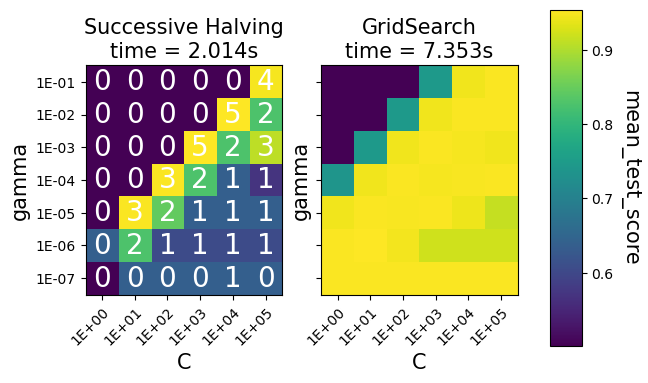

In [6]:
def make_heatmap(ax, gs, is_sh=False, make_cbar=False):
    """Helper to make a heatmap."""
    results = pd.DataFrame(gs.cv_results_)
    results[["param_C", "param_gamma"]] = results[["param_C", "param_gamma"]].astype(
        np.float64
    )
    if is_sh:
        # SH dataframe: get mean_test_score values for the highest iter
        scores_matrix = results.sort_values("iter").pivot_table(
            index="param_gamma",
            columns="param_C",
            values="mean_test_score",
            aggfunc="last",
        )
    else:
        scores_matrix = results.pivot(
            index="param_gamma", columns="param_C", values="mean_test_score"
        )

    im = ax.imshow(scores_matrix)

    ax.set_xticks(np.arange(len(Cs)))
    ax.set_xticklabels(["{:.0E}".format(x) for x in Cs])
    ax.set_xlabel("C", fontsize=15)

    ax.set_yticks(np.arange(len(gammas)))
    ax.set_yticklabels(["{:.0E}".format(x) for x in gammas])
    ax.set_ylabel("gamma", fontsize=15)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    if is_sh:
        iterations = results.pivot_table(
            index="param_gamma", columns="param_C", values="iter", aggfunc="max"
        ).values
        for i in range(len(gammas)):
            for j in range(len(Cs)):
                ax.text(
                    j,
                    i,
                    iterations[i, j],
                    ha="center",
                    va="center",
                    color="w",
                    fontsize=20,
                )

    if make_cbar:
        fig.subplots_adjust(right=0.8)
        cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
        fig.colorbar(im, cax=cbar_ax)
        cbar_ax.set_ylabel("mean_test_score", rotation=-90, va="bottom", fontsize=15)


fig, axes = plt.subplots(ncols=2, sharey=True)
ax1, ax2 = axes

make_heatmap(ax1, gsh, is_sh=True)
make_heatmap(ax2, gs, make_cbar=True)

ax1.set_title("Successive Halving\ntime = {:.3f}s".format(gsh_time), fontsize=15)
ax2.set_title("GridSearch\ntime = {:.3f}s".format(gs_time), fontsize=15)

plt.show()

Analysis of Hyperparameter Grid Search:
This is an interesting concept where the search in relationship to time and feature set is being "halved" therefore allowing for a greater relational aspect of the data to be realized. As evident, the greater the time, the greater the hyperparameterization that occurs. See Figures. GridSearchwith1k.png and GridSearchwith5k.png.